ML Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("ML Libraries loaded.")

ML Libraries loaded.


Load Cleaned Data

In [2]:
# 1. Load Data
df_clean = pd.read_csv('cleaned_crop_recommendation_data.csv')

# 2. Separate Features (X) and Target (y)
X = df_clean.drop('CROP', axis=1)
y = df_clean['CROP']

print("Data Loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"Target Labels (y) shape: {y.shape}")
print(f"Unique Crops: {y.nunique()}")

Data Loaded.
Features (X) shape: (2200, 8)
Target Labels (y) shape: (2200,)
Unique Crops: 22


Build Preprocessing Pipeline    

In [3]:
# 1. Define Column Types
numerical_features = ['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']
categorical_features = ['STATE']

# 2. Create Transformer
# - Numerical -> Standard Scaler (Normalizes values like 200mm rain vs 6.5 pH)
# - Categorical (State) -> OneHotEncoder (Converts 'Punjab' to vector)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("Preprocessing pipeline defined.")

Preprocessing pipeline defined.


Training the Model

In [4]:
# 1. Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 3. Train
print("🚀 Training Crop Recommendation Model...")
model_pipeline.fit(X_train, y_train)
print("✅ Training Complete!")

🚀 Training Crop Recommendation Model...
✅ Training Complete!


Evaluation (The Report Card)

In [5]:
# Predict on Test Set
y_pred = model_pipeline.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy * 100:.2f}%")

# Detailed Report (Precision, Recall, F1-Score)
# This tells you if the model is good at everything or just specific crops
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

🎯 Model Accuracy: 100.00%

--- Classification Report ---
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       1.00      1.00      1.00        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      1.00      1.00        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00 

Confusion Matrix Heatmap

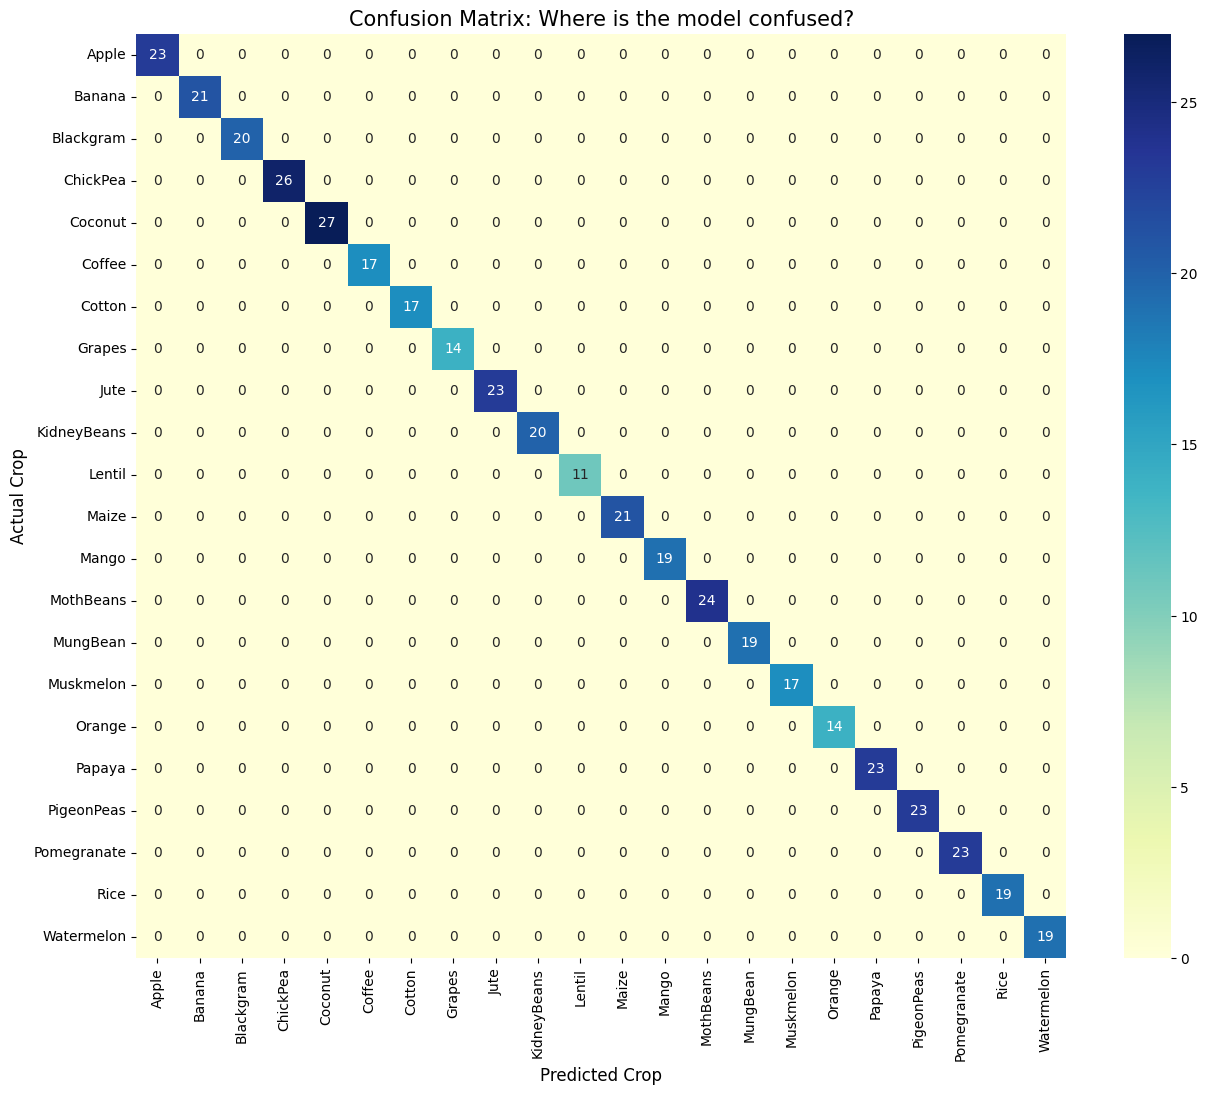

In [6]:
plt.figure(figsize=(15, 12))

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=model_pipeline.classes_, 
            yticklabels=model_pipeline.classes_)

plt.xlabel('Predicted Crop', fontsize=12)
plt.ylabel('Actual Crop', fontsize=12)
plt.title('Confusion Matrix: Where is the model confused?', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Save the Model

In [7]:
model_filename = 'crop_recommendation_model.pkl'
joblib.dump(model_pipeline, model_filename)

print(f"✅ Model saved as '{model_filename}'")

✅ Model saved as 'crop_recommendation_model.pkl'
